## Курсовая работа по дисциплине "Технологии машинного обучения"
### Выполнила студентка группы РT5-61Б Голубкова София

### 1) Поиск и выбор набора данных для построения моделей машинного обучения. 

В качестве набора данных мы будем использовать набор данных [Набор данных звезд для прогнозирования типов звезд](https://www.kaggle.com/deepu1109/star-dataset).

*CSV-файл содержит набор данных из 240 звезд 6 классов*:
* Коричневый Карлик - > Тип Звезды = 0
* Красный Карлик - > Тип Звезды = 1
* Белый Карлик - > Тип Звезды = 2
* Главная Последовательность - > Тип Звезды = 3
* Супергигант - > Тип Звезды = 4
* Гипергигант - > Тип Звезды = 5

*Файл содержит следующие колонки*:
* Temperature (K) - эта колонка состоит из температуры поверхности нескольких звезд
* Luminosity(L/Lo) - эта колонка состоит из светимости нескольких звезд, рассчитанной по отношению к Солнцу(L/Lo)
* Radius(R/Ro) - этот столбец состоит из радиуса нескольких звезд, вычисленного относительно Солнца(R / Ro)
* Absolute magnitude(Mv) - эта колонка состоит из абсолютной визуальной величины (Mv) нескольких звезд
* Star type - этот столбец является выходным классом (6 классов, описанных выше) 
* Star color - этот столбец содержит информацию о цвете каждой звезды после спектрального анализа
* Spectral Class - этот столбец содержит информацию о спектральных классах каждой звезды 

В рассматриваемом примере **будем решать задачу классификации**. В качестве целевого признака будем использовать "Star type". Этот признак содержит значения 0,1,2,3,4,5, следовательно мы будем решать задачу *многоклассовой классификации*.

#### Импорт библиотек

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

#### Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

In [81]:
data = pd.read_csv('../datasets/6 class csv.csv')

### 2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [82]:
# первые 5 строк датасета
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [83]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(240, 7)

In [84]:
# Список колонок с типами данных 
data.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [85]:
# Проверим наличие пустых значений
data.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

**Вывод:** Представленный набор данных не содержит пропусков.

Построим некоторые графики для понимания структуры данных.

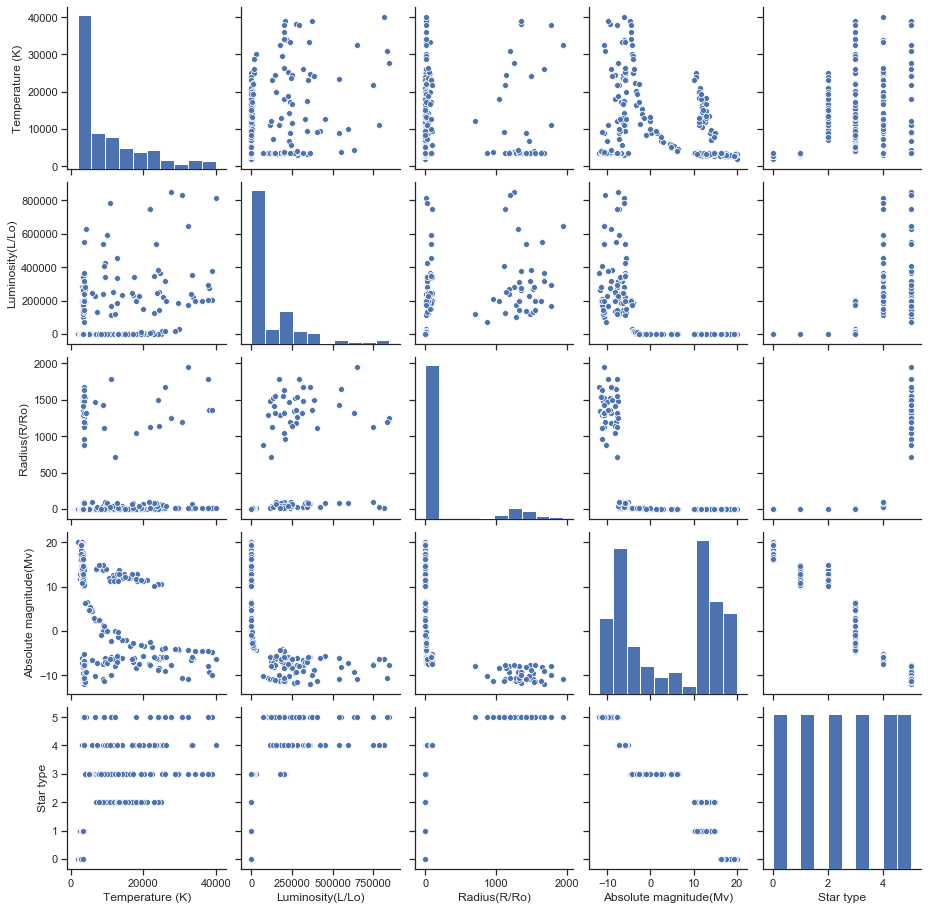

In [86]:
# Парные диаграммы
sns.pairplot(data)

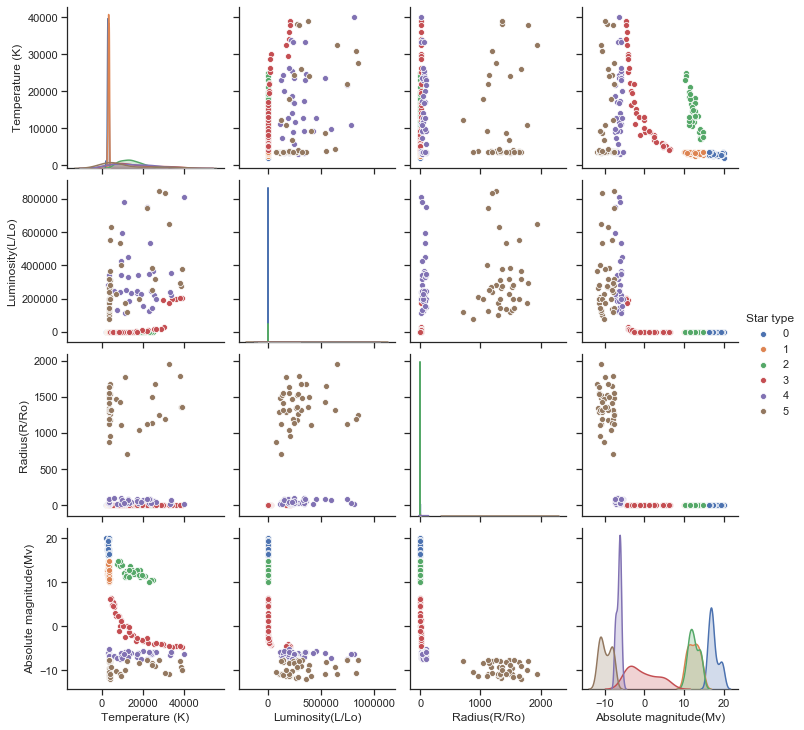

In [87]:
sns.pairplot(data, hue="Star type")

In [88]:
# Оценим дисбаланс классов для Star Type
data['Star type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [89]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1, class_2, class_3, class_4, class_5 = data['Star type'].value_counts()
print('Класс 0 составляет {}%, класс 1 составляет {}%, класс 2 составляет {}%, класс 3 составляет {}%, класс 4 составляет {}%, класс 5 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100, round(class_2 / total, 4)*100, 
              round(class_3 / total, 4)*100, round(class_4 / total, 4)*100, round(class_5 / total, 4)*100))

Класс 0 составляет 16.669999999999998%, класс 1 составляет 16.669999999999998%, класс 2 составляет 16.669999999999998%, класс 3 составляет 16.669999999999998%, класс 4 составляет 16.669999999999998%, класс 5 составляет 16.669999999999998%.


**Вывод.** Дисбаланс классов отсутствует.

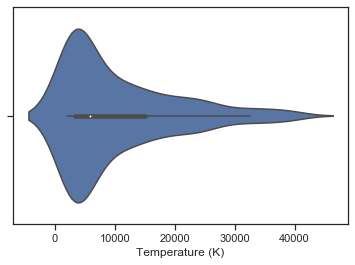

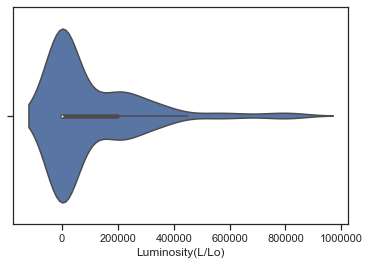

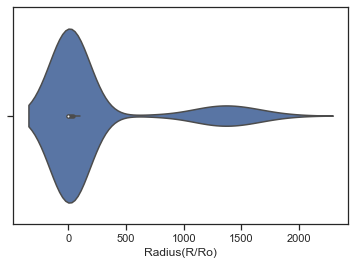

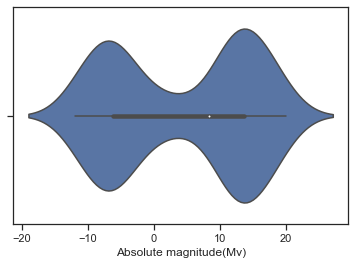

In [90]:
# Скрипичные диаграммы для числовых колонок
for col in ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']:
    sns.violinplot(x=data[col])
    plt.show()

### 3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных.

Кодирование категорий целочисленными значениями - label encoding.

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
le = LabelEncoder()
color_enc_le = le.fit_transform(data['Star color'])

In [93]:
(data['Star color'].unique(), np.unique(color_enc_le))

(array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
        'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
        'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
        'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
        'Blue-White'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]))

In [94]:
sp_enc_le = le.fit_transform(data['Spectral Class'])
(data['Spectral Class'].unique(), np.unique(sp_enc_le))

(array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6]))

In [95]:
data['Spectral Class'] = sp_enc_le

In [96]:
data['Star color'] = color_enc_le

In [97]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5


In [98]:
# Числовые колонки для масштабирования
scale_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']

In [99]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [100]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [101]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Temperature (K)_scaled,Luminosity(L/Lo)_scaled,Radius(R/Ro)_scaled,Absolute magnitude(Mv)_scaled,Star color_scaled,Spectral Class_scaled
0,3068,0.002400,0.1700,16.12,0,10,5,0.029663,2.731275e-09,0.000083,0.876798,0.555556,0.833333
1,3042,0.000500,0.1542,16.60,0,10,5,0.028980,4.944550e-10,0.000075,0.891807,0.555556,0.833333
2,2600,0.000300,0.1020,18.70,0,10,5,0.017367,2.590003e-10,0.000048,0.957473,0.555556,0.833333
3,2800,0.000200,0.1600,16.65,0,10,5,0.022622,1.412729e-10,0.000078,0.893371,0.555556,0.833333
4,1939,0.000138,0.1030,20.06,0,10,5,0.000000,6.828189e-11,0.000049,1.000000,0.555556,0.833333


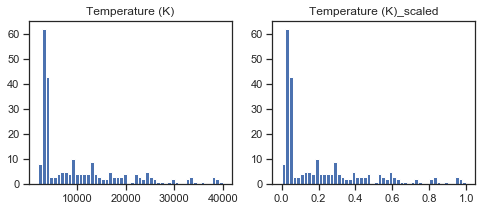

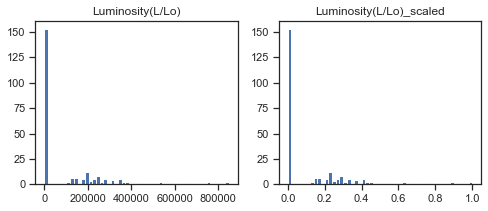

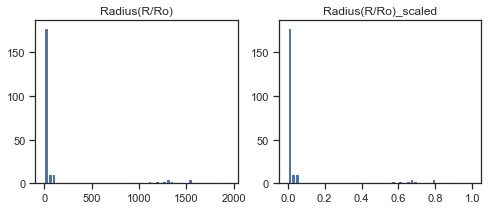

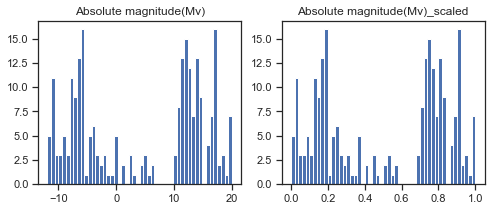

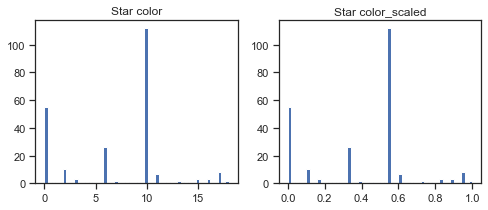

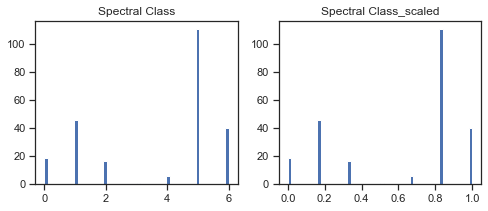

In [102]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### 4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [103]:
data_1 = data.drop(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class'],axis=1)
data_1.head()

,Star type,Temperature (K)_scaled,Luminosity(L/Lo)_scaled,Radius(R/Ro)_scaled,Absolute magnitude(Mv)_scaled,Star color_scaled,Spectral Class_scaled
0,0,0.029663,2.731275e-09,0.000083,0.876798,0.555556,0.833333
1,0,0.028980,4.944550e-10,0.000075,0.891807,0.555556,0.833333
2,0,0.017367,2.590003e-10,0.000048,0.957473,0.555556,0.833333
3,0,0.022622,1.412729e-10,0.000078,0.893371,0.555556,0.833333
4,0,0.000000,6.828189e-11,0.000049,1.000000,0.555556,0.833333


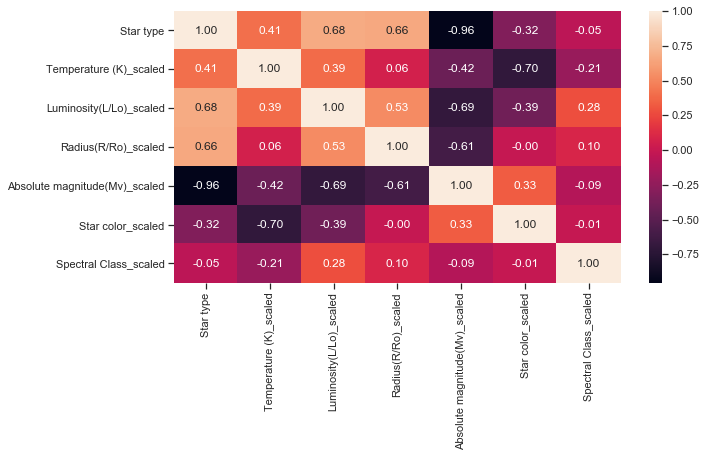

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data_1.corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие **выводы**:
* Целевой признак классификации "Star type" наиболее сильно коррелирует с абсолютной магнитудой (-0.96), светимостью (0.68) и радиусом (0.66). Абсолютная магнитуда имеет корреляцию с признаком освещенности (0.69), что может свидетельствовать о зависимости между ними. В модели точно следует оставить признаки "Absolute magnitude(Mv)" и "Radius(R/Ro)".
* Признаки температура и цвет звезды имеют корреляцию, равную -0.7, поэтому оба признака не следуют включать в модели. Будем использовать признак "Temperature", так как он лучше чем "Star color" коррелирует и с целевым признаком классификации(0.41).
* Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения. 

На основании кореляционного анализа мою принято решение составить модель на основании признаков "Absolute magnitude(Mv)", "Radius(R/Ro)", "Temperature" и "Star type".

### 5) Выбор метрик для последующей оценки качества моделей.

#### В качестве метрик для решения задачи классификации будем использовать:

Метрики для небинарной классификации:
1. Accuracy 

Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов.

2. Матрица ошибок или Confusion Matrix

Количество верно и ошибочно классифицированных данных, представленное в виде матрицы.


#### Сохранение и визуализация метрик

In [105]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

### 6) Выбор наиболее подходящих моделей для решения задачи классификации.
Для задачи классификации будем использовать следующие модели:
* Логистическая регрессия
* Метод ближайших соседей
* Машина опорных векторов
* Решающее дерево
* Случайный лес
* Градиентный бустинг

### 7) Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [107]:
# выберем подходящие колонки
X = data_1[['Absolute magnitude(Mv)_scaled','Radius(R/Ro)_scaled','Temperature (K)_scaled']]
y = data_1['Star type']
print(X.head(), "\n")
print(y.head())

   Absolute magnitude(Mv)_scaled  Radius(R/Ro)_scaled  Temperature (K)_scaled
0                       0.876798             0.000083                0.029663
1                       0.891807             0.000075                0.028980
2                       0.957473             0.000048                0.017367
3                       0.893371             0.000078                0.022622
4                       1.000000             0.000049                0.000000 

0    0
1    0
2    0
3    0
4    0
Name: Star type, dtype: int64


In [108]:
# разделим выборку
star_X_train, star_X_test, star_y_train, star_y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

Метод К-ближайших соседей:

In [156]:
# 5 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=5)
cl1_1.fit(star_X_train, star_y_train)
target1_1 = cl1_1.predict(star_X_test)
len(target1_1), target1_1

(48,
 array([4, 1, 2, 3, 4, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 4, 5, 0, 3, 4, 5, 5,
        4, 4, 5, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 3, 1, 4, 5, 1, 3, 5, 3,
        0, 3, 1, 2], dtype=int64))

In [157]:
a = accuracy_score(star_y_test, target1_1)
print('accuracy_score для KNeighbors = {}'.format(a))

accuracy_score для KNeighbors = 0.9375


In [158]:
c = confusion_matrix(star_y_test, target1_1, labels=[0, 1, 2, 3, 4, 5])
print(c)

[[ 6  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 10  3  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 10]]


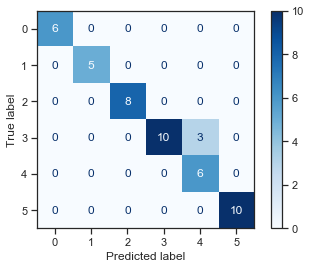

In [159]:
plot_confusion_matrix(cl1_1, star_X_test, star_y_test, 
                      display_labels=[0, 1, 2, 3, 4, 5], cmap=plt.cm.Blues)

Логистическая регрессия:

In [160]:
log_r = LogisticRegression()
log_r.fit(star_X_train, star_y_train)
target1_1 = log_r.predict(star_X_test)
len(target1_1), target1_1

(48,
 array([4, 1, 2, 4, 4, 0, 1, 0, 5, 5, 5, 0, 1, 1, 2, 4, 5, 0, 4, 4, 5, 5,
        4, 4, 5, 5, 0, 0, 1, 2, 0, 4, 2, 2, 4, 1, 4, 1, 4, 5, 1, 1, 5, 4,
        0, 4, 1, 0], dtype=int64))

In [161]:
a = accuracy_score(star_y_test, target1_1)
print('accuracy_score для LogisticRegression = {}'.format(a))

accuracy_score для LogisticRegression = 0.6666666666666666


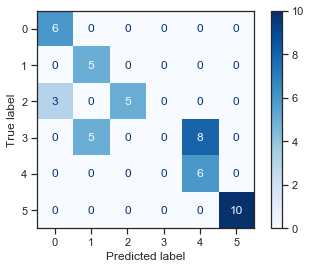

In [162]:
plot_confusion_matrix(log_r, star_X_test, star_y_test, 
                      display_labels=[0, 1, 2, 3, 4, 5], cmap=plt.cm.Blues)

Машина опорных векторов:

In [163]:
svc = SVC()
svc.fit(star_X_train, star_y_train)
target1_1 = svc.predict(star_X_test)
len(target1_1), target1_1

(48,
 array([4, 1, 2, 3, 4, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 4, 5, 0, 3, 4, 5, 5,
        4, 4, 5, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 4, 1, 4, 5, 1, 3, 5, 3,
        0, 3, 1, 1], dtype=int64))

In [164]:
a = accuracy_score(star_y_test, target1_1)
print('accuracy_score для SVC = {}'.format(a))

accuracy_score для SVC = 0.8958333333333334


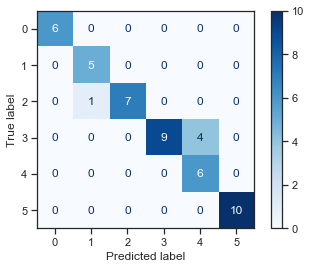

In [165]:
plot_confusion_matrix(svc, star_X_test, star_y_test, 
                      display_labels=[0, 1, 2, 3, 4, 5], cmap=plt.cm.Blues)

Решающее дерево:

In [166]:
tree = DecisionTreeClassifier()
tree.fit(star_X_train, star_y_train)
target1_1 = tree.predict(star_X_test)
len(target1_1), target1_1

(48,
 array([4, 1, 2, 3, 3, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 3, 5, 0, 3, 4, 5, 5,
        4, 3, 5, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 3, 1, 4, 5, 1, 3, 5, 3,
        0, 3, 1, 2], dtype=int64))

In [168]:
a = accuracy_score(star_y_test, target1_1)
print('accuracy_score для DecisionTreeClassifier = {}'.format(a))

accuracy_score для DecisionTreeClassifier = 1.0


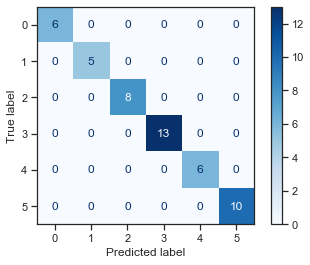

In [170]:
plot_confusion_matrix(tree, star_X_test, star_y_test, 
                      display_labels=[0, 1, 2, 3, 4, 5], cmap=plt.cm.Blues)

Визуализируем дерево решений:

In [205]:
from IPython.display import Image
from sklearn.externals.six import StringIO 
import pydotplus

In [206]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

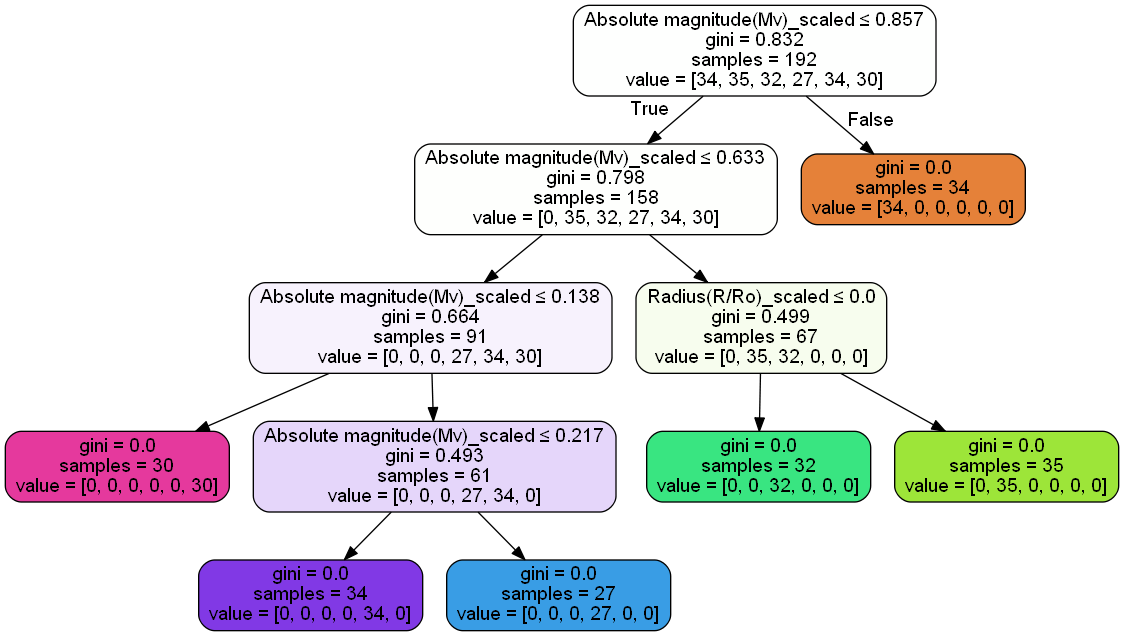

In [215]:
tree0 = DecisionTreeClassifier()
tree0.fit(star_X_train, star_y_train)
Image(get_png_tree(tree0, data_1[['Absolute magnitude(Mv)_scaled','Radius(R/Ro)_scaled','Temperature (K)_scaled']].columns), height="100")

Градиентный бустинг:

In [171]:
grad = GradientBoostingClassifier()
grad.fit(star_X_train, star_y_train)
target1_1 = grad.predict(star_X_test)
len(target1_1), target1_1

(48,
 array([4, 1, 2, 3, 3, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 3, 5, 0, 3, 4, 5, 5,
        4, 3, 5, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 3, 1, 4, 5, 1, 3, 5, 3,
        0, 3, 1, 2], dtype=int64))

In [172]:
a = accuracy_score(star_y_test, target1_1)
print('accuracy_score для GradientBoostingClassifier = {}'.format(a))

accuracy_score для GradientBoostingClassifier = 1.0


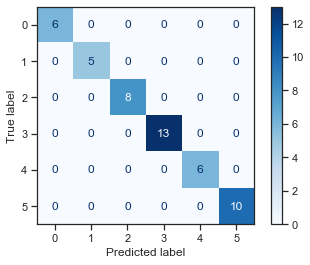

In [173]:
plot_confusion_matrix(grad, star_X_test, star_y_test, 
                      display_labels=[0, 1, 2, 3, 4, 5], cmap=plt.cm.Blues)

Случайный лес:

In [174]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(star_X_train, star_y_train)
target1_1 = rnd_forest.predict(star_X_test)
len(target1_1), target1_1

(48,
 array([4, 1, 2, 3, 3, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 3, 5, 0, 3, 4, 5, 5,
        4, 3, 5, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 3, 1, 4, 5, 1, 3, 5, 3,
        0, 3, 1, 2], dtype=int64))

In [175]:
a = accuracy_score(star_y_test, target1_1)
print('accuracy_score для RandomForestClassifier = {}'.format(a))

accuracy_score для RandomForestClassifier = 1.0


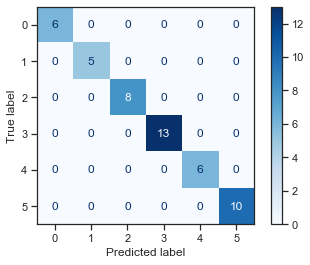

In [176]:
plot_confusion_matrix(rnd_forest, star_X_test, star_y_test, 
                      display_labels=[0, 1, 2, 3, 4, 5], cmap=plt.cm.Blues)

### 9) Подбор гиперпараметров для выбранных моделей. 

Для метода ближайших соседей:

In [182]:
n_range = np.array(range(1,150,10))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
         131, 141])}]

In [189]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters)
clf_gs.fit(star_X_train, star_y_train)

Wall time: 417 ms


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [190]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [191]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 1}

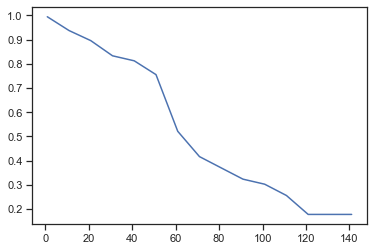

In [192]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### 10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [194]:
# 1 ближайшиq сосед
cl1_0 = KNeighborsClassifier(n_neighbors=1)
cl1_0.fit(star_X_train, star_y_train)
target1_1 = cl1_0.predict(star_X_test)
len(target1_1), target1_1

(48,
 array([4, 1, 2, 3, 4, 0, 3, 2, 5, 5, 5, 0, 1, 3, 2, 4, 5, 0, 3, 4, 5, 5,
        4, 3, 5, 5, 0, 0, 3, 2, 2, 4, 2, 2, 4, 3, 3, 1, 4, 5, 1, 3, 5, 3,
        0, 3, 1, 2], dtype=int64))

In [195]:
a = accuracy_score(star_y_test, target1_1)
print('accuracy_score для KNeighbors (K=1) = {}'.format(a))

accuracy_score для KNeighbors (K=1) = 0.9583333333333334


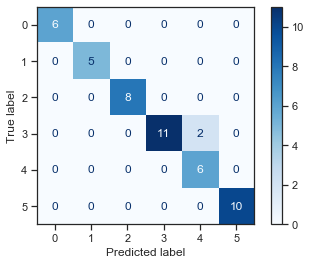

In [196]:
plot_confusion_matrix(cl1_0, star_X_test, star_y_test, 
                      display_labels=[0, 1, 2, 3, 4, 5], cmap=plt.cm.Blues)

**Вывод**: с подбором гиперпараметра качечество модели улучшилось.

### 11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. 

In [216]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [219]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['accuracy'], dtype=object)

In [218]:
clasMetricLogger.add('accuracy','LogR', accuracy_score(star_y_test, log_r.predict(star_X_test)))
clasMetricLogger.add('accuracy','KNN_1', accuracy_score(star_y_test, cl1_0.predict(star_X_test)))
clasMetricLogger.add('accuracy','SVC', accuracy_score(star_y_test, svc.predict(star_X_test)))
clasMetricLogger.add('accuracy','Tree', accuracy_score(star_y_test, tree.predict(star_X_test)))
clasMetricLogger.add('accuracy','RF', accuracy_score(star_y_test, rnd_forest.predict(star_X_test)))
clasMetricLogger.add('accuracy','GB', accuracy_score(star_y_test, grad.predict(star_X_test)))

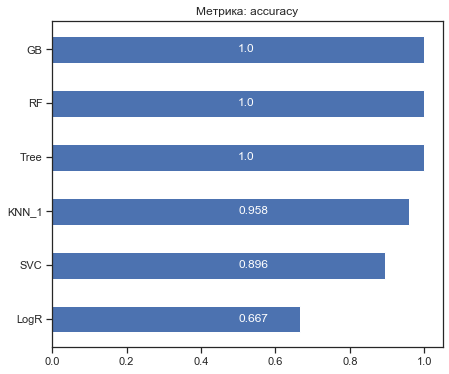

In [220]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

### **Вывод**: на основании метрики "Аccuracy" лушими моделями оказались решающее дерево, случайный лес и градиентный бустинг. Худший результат показал метод логистической регрессии. 

Следует отметить, что метрика "Accuracy" показывает точность по всем классам, но точность может быть различной для различных классов.
Это очень серьезная проблема, которая часто возникает на несбалансированных выборках.

In [222]:
from typing import Dict

In [223]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

Для примера возьмем модель ближайших соседей К=1:

In [224]:
print_accuracy_score_for_classes(star_y_test, cl1_0.predict(star_X_test))

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 0.8461538461538461
4 	 1.0
5 	 1.0


Видим, что для 3 класса точность составила 0.8, тогда как для остальных классов 1.0.

Рассмотрим наши лучшие модели:


In [226]:
print_accuracy_score_for_classes(star_y_test, tree.predict(star_X_test))

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 1.0
5 	 1.0


In [227]:
print_accuracy_score_for_classes(star_y_test, grad.predict(star_X_test))

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 1.0
5 	 1.0


In [228]:
print_accuracy_score_for_classes(star_y_test, rnd_forest.predict(star_X_test))

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 1.0
5 	 1.0


#### Значения метрики  для всех классов совпали. Значит, мы смело можем заявить, что проверяемые нами методы решающего дерева, случайного леса и градиентного бустинга являются лучшими. Следует отметить, что наша модель показала точность 100% на этих моделях, что может говорить об удачном выборе признаков для построения модели.